In [2]:
from importLib import import_from_github, import_from_github_using_path
# imported tutorial
import_from_github(r"https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb")
import_from_github("https://raw.githubusercontent.com/GGisMee/PyLibraries/main/ml_toolkit/ml_funcs.py")
import_from_github('https://raw.githubusercontent.com/GGisMee/PyLibraries/main/ml_toolkit/helper_functions.py')
# libraries
import torch as pt
print(f"PyTorch version: {pt.__version__}")

device = 'cuda' if pt.cuda.is_available() else 'cpu'

import ml_funcs as mlf
import torchmetrics as tm
import torchvision as tv


/Users/gustavgamstedt/Desktop/github to hemma/PyTorch/03/exercises/03_pytorch_computer_vision_exercises.ipynb already exists
/Users/gustavgamstedt/Desktop/github to hemma/PyTorch/03/exercises/ml_funcs.py already exists
/Users/gustavgamstedt/Desktop/github to hemma/PyTorch/03/exercises/helper_functions.py already exists
PyTorch version: 2.0.1


##### QNA

What are 3 areas in industry where computer vision is currently being used?
1. Tesla autopilot
2. Face recogition
3. herbs and plants recognition (i.e telling which the name of plants from photos)

Search "what is overfitting in machine learning" and write down a sentence about what you find. 
* It is when the module is to fitted on the current data and therefore doesn't react and produce reliable results on new data

Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each
1. Decrease the Model Complexity
2. Data Augmentation
    - Technique of artificially increasing the training set by creating modified copies of a dataset using existing data
3. Weight Regularization
    - Technique in which slight modifications are made to the learning algorithm which in its turn makes the model generalize better

### Load dataset MNIST

In [3]:
import torchvision as tv
from torchvision.transforms import ToTensor
import os
train_data = tv.datasets.MNIST(root=f"{os.getcwd()}/data",
                               train=True, 
                               transform=ToTensor(), 
                               target_transform=None,
                               download=True
                               )

test_data = tv.datasets.MNIST(root=f"{os.getcwd()}/data",
                              train=False, 
                              transform=ToTensor(), 
                              target_transform=None,
                              download=True)

import matplotlib.pyplot as plt
import torchmetrics as tm


In [4]:
print(len(train_data), len(test_data))

60000 10000


### Visualize data

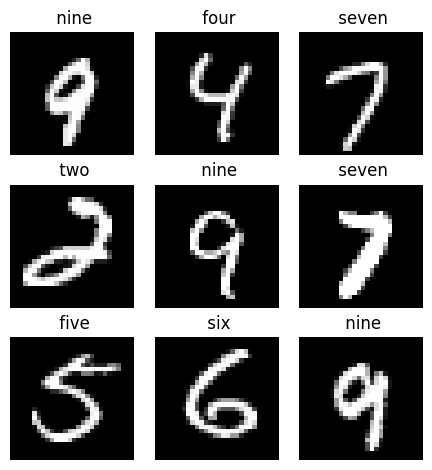

In [5]:
nrows = 3
ncols = 3
nprod = nrows*ncols
import random
seed = True
random.seed(42) if seed else None



for i in range(nprod):
    random_index = random.randint(0,len(train_data.targets))
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(train_data.data[random_index].squeeze(0), cmap="gray")
    plt.axis(False)
    plt.title(test_data.classes[train_data.targets[random_index]][3:]) 

plt.tight_layout(h_pad=0.5,w_pad=-10)
plt.show()
        



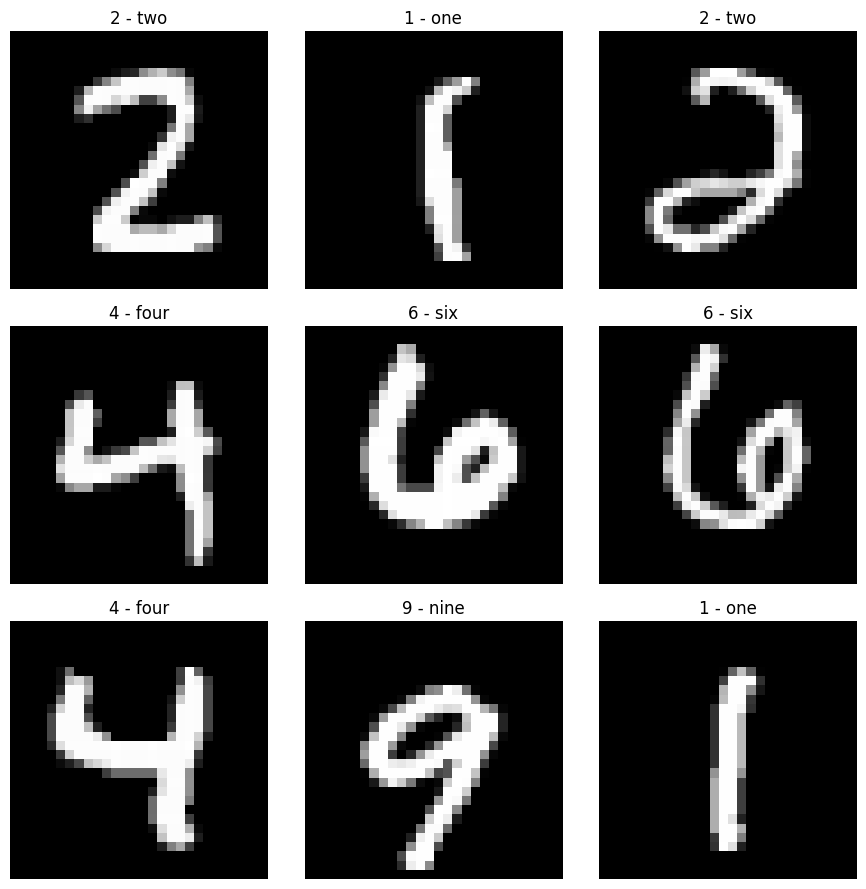

In [6]:
y_true, sample = mlf.get_sample(test_data, 9,42)
sample = [el.squeeze() for el in sample]
mlf.view.images(sample,y_true, train_data.classes)

### Turn MNIST to dataloaders

In [7]:
from torch.utils.data import DataLoader
pt.manual_seed(42)
pt.cuda.manual_seed(42)
train_dataloader = DataLoader(dataset=train_data, batch_size=32,shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32,shuffle=False)

In [8]:
train_features_batch, training_labels_batch = next(iter(test_dataloader))
train_features_batch.shape, training_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

### Create Model

In [9]:
from torch import nn
class MNIST_Model_V0(nn.Module):
    def __init__(self, input_shape:int, output_shape:int, hidden_units:int=10):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(input_shape,hidden_units, 
                      kernel_size=3,stride=1, padding=1),
            nn.ReLU(),

            nn.Conv2d(hidden_units, hidden_units,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            nn.Conv2d(hidden_units, hidden_units,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units*49,output_shape)
        )
        
    def forward(self,X:pt.Tensor) -> pt.Tensor:
        X_change = self.conv_block_1(X)
        X_change = self.conv_block_2(X_change)
        # print(f"Original: {X_change.shape}")
        # print((pt.tensor(X_change.shape)[1:].prod().item()))
        X_change = self.classifier(X_change)
        
        return X_change

In [10]:
# from torch import nn
# class MNIST_Model_Experimental(nn.Module):
#     def __init__(self, input_shape:int, output_shape:int, hidden_units:int=10):
#         super().__init__()
#         self.conv_kernal_size = 3
#         self.conv_stride = 1
#         1 = 1
#         self.MaxPool_kernal_size = 2

#         self.output_shape = output_shape
#         self.hidden_units = hidden_units

#         self.conv_block_1 = nn.Sequential(
#             nn.Conv2d(input_shape,hidden_units, 
#                       kernel_size=self.conv_kernal_size,stride=self.conv_stride, padding=self.conv_padding),
#             nn.ReLU(),

#             nn.Conv2d(hidden_units, hidden_units,
#                       kernel_size=self.conv_kernal_size, stride=self.conv_stride, padding=self.conv_padding),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=self.MaxPool_kernal_size)
#         )
#         self.conv_block_2 = nn.Sequential(
#             nn.Conv2d(hidden_units, hidden_units,
#                       kernel_size=self.conv_kernal_size, stride=self.conv_stride, padding=self.conv_padding),
#             nn.ReLU(),

#             nn.Conv2d(hidden_units, hidden_units,
#                       kernel_size=self.conv_kernal_size, stride=self.conv_stride, padding=self.conv_padding),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=self.MaxPool_kernal_size)
#         )
#     def forward(self,X:pt.Tensor) -> pt.Tensor:
#         X_change = self.conv_block_1(X)
#         X_change = self.conv_block_2(X_change)
#         #print(f"Original: {X_change.shape}")
#         new_hidden_units = (pt.tensor(X_change.shape)[1:].prod().item())
#         #print(f"New hidden units: {new_hidden_units}")
#         self.classifier = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(new_hidden_units,self.output_shape)
#         )
#         return self.classifier(X_change)

In [12]:
model0 = MNIST_Model_V0(input_shape=1, output_shape=len(train_data.classes), hidden_units=10).to(device)

# get model compiled using pt2.0
# model0 = pt.compile(model0)

model0

MNIST_Model_V0(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Test using random Tensor

In [11]:
rand_tensor = pt.rand((1,1,28,28))
model0(rand_tensor)

tensor([[ 0.0348, -0.0480, -0.0591,  0.0290,  0.0498,  0.0100,  0.0203,  0.0456,
         -0.0332,  0.0484]], grad_fn=<AddmmBackward0>)

### Setup optimizer, loss function and accuracy function 

In [12]:
from helper_functions import accuracy_fn
optimizer = pt.optim.SGD(params=model0.parameters(), lr=0.1)

loss_fn = nn.CrossEntropyLoss()

### Train model 

In [13]:
from helper_functions import set_seeds
from timeit import default_timer as timer
from tqdm.auto import tqdm
start = timer()
set_seeds(42)
epochs = 3

for epoch in tqdm(range(epochs), desc="Epoch loops"):
    print(f"Epoch: {epoch}\n----------")
    mlf.Model_operations.train_step(model0, test_dataloader, optimizer, loss_fn, accuracy_fn, device,show=True)
    mlf.Model_operations.test_step(model0, train_dataloader, loss_fn, accuracy_fn, device,show=True)


time = mlf.time_func(start, device)

Epoch loops:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
train loss: 2.0118391513824463, train accuracy: 25.9185303514377
Test loss: 0.7829, Test acc: 78.2033
Epoch: 1
----------
train loss: 0.3353755474090576, train accuracy: 90.2555910543131
Test loss: 0.4776, Test acc: 85.7100
Epoch: 2
----------
train loss: 0.196478471159935, train accuracy: 93.81988817891374
Test loss: 0.2359, Test acc: 93.1667

Train time on cpu: 66.756 seconds


In [13]:
mlf.Model_operations.eval_model(model0, train_dataloader, loss_fn, accuracy_fn, device)

{'model_name': 'MNIST_Model_V0',
 'model_loss': 2.303729772567749,
 'model_acc': 9.036666666666667}

### Load and save model

In [16]:
# mlf.save_model_state_dict(model0,'model/MNIST_model')
loaded_model = mlf.save_load.load_state_dict(MNIST_Model_V0(1,len(train_data.classes),10),'model/MNIST_model')

### Visualize results

#### func

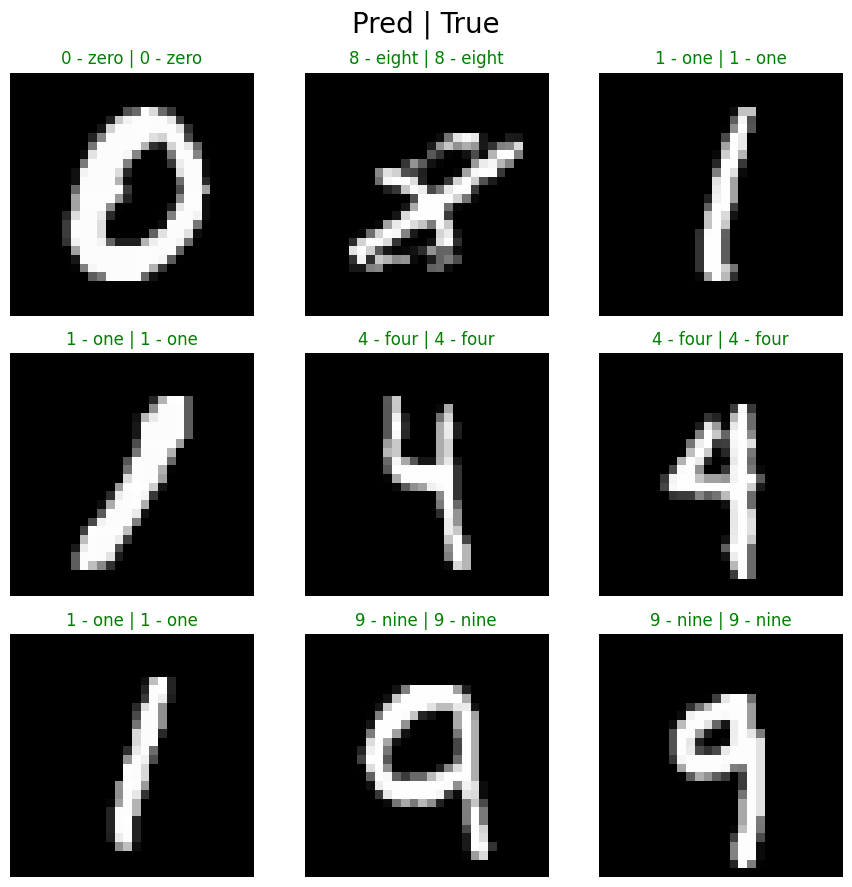

In [15]:
test_labels, test_samples = mlf.get_sample(test_data, 9)
# squeezed_samples = [el.squeeze() for el in test_samples]
# mlf.view.images(squeezed_samples,test_labels,test_data.classes)
preds = mlf.Model_operations.make_predictions(loaded_model,test_samples, device)
# print(preds.shape)
# print(preds)
preds = preds.squeeze().argmax(1)
# print(preds)
mlf.view.true_false(preds, test_labels,test_samples,test_data.classes, 3,3)

In [28]:
y_preds = mlf.Model_operations.predict_all(loaded_model, test_dataloader,device,1,1)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([3

In [29]:
print(y_preds[:5])
print(test_data.targets[:5])

tensor([7, 2, 1, 0, 4])
tensor([7, 2, 1, 0, 4])


Our confusion matrix
: tensor([[ 962,    1,    3,    0,    0,    1,    6,    1,    3,    3],
        [   0, 1125,    5,    1,    1,    0,    0,    0,    3,    0],
        [   0,    0, 1027,    0,    0,    0,    0,    3,    2,    0],
        [   0,    0,    2,  985,    1,    4,    0,    7,    7,    4],
        [   0,    1,    1,    0,  976,    0,    0,    2,    0,    2],
        [   1,    1,    0,    4,    2,  876,    1,    0,    5,    2],
        [   0,    5,    0,    0,    0,    3,  945,    0,    5,    0],
        [   0,    0,    8,    1,    0,    1,    0, 1009,    1,    8],
        [   0,    1,    2,    2,    1,    0,    2,    0,  962,    4],
        [   1,    2,    0,    2,    5,    1,    0,    4,    2,  992]])


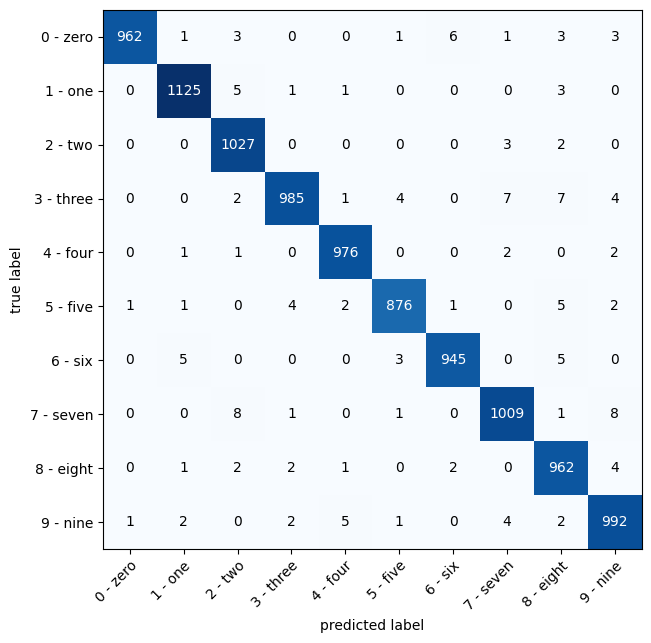

In [30]:
mlf.confusion_matrix(y_preds, test_data.targets, test_data.classes)

#### non func

In [23]:
import torchmetrics as tm
from tqdm.auto import tqdm
import mlxtend


print(f"mlxtend: {mlxtend.__version__}")

# 1. Make prediction with trained model
y_preds = []
loaded_model.eval()
with pt.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send data + targets to target device
        X = X.to(device)
        # Do the forward pass
        y_logits = loaded_model(X)
        # Logits -> pred probs
        y_pred = pt.softmax(y_logits.squeeze(), dim=0).argmax(1)
        
        # Put predictions on CPU for evaluation for matplotlib
        y_preds.append(y_pred.cpu())

# Concatinate list of predictions to a tensor
y_preds = pt.cat(y_preds)
print(y_preds.shape)

mlxtend: 0.22.0


Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

torch.Size([10000])


Our confusion matrix
: tensor([[109, 126,  91, 109,  90,  74,  75, 105, 103,  98],
        [118, 147,  85,  98,  99,  93, 106, 110, 121, 158],
        [ 90, 139, 102,  95, 107,  79, 110,  74, 108, 128],
        [112, 137,  77,  99,  95,  71,  83,  89, 112, 135],
        [ 97, 130,  82,  82, 109,  68,  72,  84, 134, 124],
        [104,  99,  79,  80,  87,  74,  80,  81, 112,  96],
        [103, 129,  76,  82,  82,  74,  84,  75, 122, 131],
        [114, 129, 101,  92, 100,  87,  81,  84, 108, 132],
        [ 95, 134,  89,  99, 103,  53,  83,  67, 121, 130],
        [102, 117,  77,  80, 104,  79, 124,  84, 122, 120]])


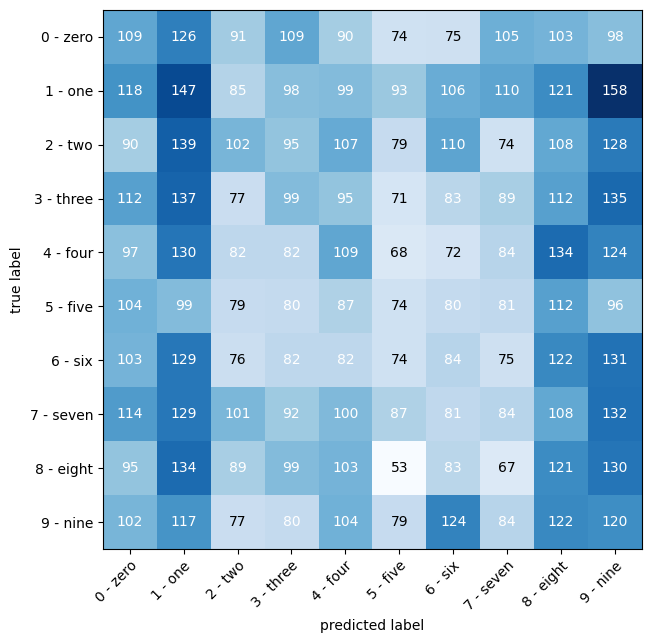

In [27]:
from mlxtend.plotting import plot_confusion_matrix
class_names = train_data.classes
# Setup a confusion matrix with a type and a number of classes
conf_mat = tm.ConfusionMatrix('multiclass',num_classes=len(class_names))

# Gets a tensor using conf_mat 
conf_mat_tensor = conf_mat(preds=y_preds, target=test_data.targets) 
print(f"Our confusion matrix\n: {conf_mat_tensor}")

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=conf_mat_tensor.numpy(), # to numpy because it mpl likes np
    class_names=class_names,
    figsize=(10,7)
)